<a href="https://colab.research.google.com/github/hamzamufeed/Ai_ML_AutomaticSpamReviewDetection/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import nltk
import string
from joblib import dump, load
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Read CSV File

In [ ]:
dat = pd.read_csv("drive/MyDrive/Output.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
dat.head()

,reviewID,reviewerID,reviewContent,rating,usefulCount,date,reviewerID.1,firstCount,reviewCount,Filtered
0,---2eJpQ2HAnRQRp2v7XLA,-ORdirlxcallT7dzlZlW2A,I came to Chicago on business and was initiall...,5,5,9/28/2011,-ORdirlxcallT7dzlZlW2A,0.0,2.0,0.0
1,--0gvJ0LlByoUsFi6x4eEQ,biZ0fIcZp7B-KBJ3EGcX7Q,I still love this place but the took Mu Shu of...,5,2,Update - 5/12/2009,biZ0fIcZp7B-KBJ3EGcX7Q,268.0,543.0,0.0
2,--1PwTt0AfyPG1pE7bB6Nw,pW9LvtC-hZ0PRAOUn7aZ2A,Alan is the best CPA that I know. He knows all...,5,0,8/15/2006,pW9LvtC-hZ0PRAOUn7aZ2A,834.0,1463.0,0.0
3,--87QVdPvgbDK3GeVxFRzg,92rtlWxS2aOngzkKhi-OxQ,My family has been using Korean Air for many m...,4,0,7/28/2012,92rtlWxS2aOngzkKhi-OxQ,43.0,158.0,0.0
4,--99ZJoVHP32iSd4i4nlZw,Egu4qSFR56EhGuTHZTaVjA,I hadn't been to Grisanti's since a pre-homeco...,3,0,1/28/2010,Egu4qSFR56EhGuTHZTaVjA,133.0,725.0,0.0


# Data Analysis

##Data Summary

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115477 entries, 0 to 115476
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   reviewID       115477 non-null  object 
 1   reviewerID     115477 non-null  object 
 2   reviewContent  115476 non-null  object 
 3   rating         115476 non-null  object 
 4   usefulCount    115476 non-null  object 
 5   date           115462 non-null  object 
 6   reviewerID.1   115462 non-null  object 
 7   firstCount     115462 non-null  float64
 8   reviewCount    115461 non-null  float64
 9   Filtered       115461 non-null  float64
dtypes: float64(3), object(7)
memory usage: 8.8+ MB


## Remove Nulls

In [ ]:
dat = dat.dropna(how='any',axis=0) 

## Remove Duplicates

In [ ]:
dat.drop_duplicates(inplace = True)

## Convert Object data type to float

In [ ]:
dat['rating'] = dat['rating'].astype(float)
dat['usefulCount'] = dat['usefulCount'].astype(float)
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115460 entries, 0 to 115476
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   reviewID       115460 non-null  object 
 1   reviewerID     115460 non-null  object 
 2   reviewContent  115460 non-null  object 
 3   rating         115460 non-null  float64
 4   usefulCount    115460 non-null  float64
 5   date           115460 non-null  object 
 6   reviewerID.1   115460 non-null  object 
 7   firstCount     115460 non-null  float64
 8   reviewCount    115460 non-null  float64
 9   Filtered       115460 non-null  float64
dtypes: float64(5), object(5)
memory usage: 9.7+ MB


## Number of spam and non-spam records

In [ ]:
dat.groupby('Filtered')['reviewContent'].count()

Filtered
0.0    95698
1.0    19762
Name: reviewContent, dtype: int64

## Average Number of Characters

In [ ]:
dat['character_cnt'] = dat['reviewContent'].str.len()
dat.groupby('Filtered')['character_cnt'].mean()

Filtered
0.0    558.037880
1.0    483.213997
Name: character_cnt, dtype: float64

## Average Number of Words

In [ ]:
dat['word_counts'] = dat['reviewContent'].str.split().str.len()
dat.groupby('Filtered')['word_counts'].mean()

Filtered
0.0    104.042969
1.0     90.248204
Name: word_counts, dtype: float64

## Average Number of Characters per Word

In [ ]:
dat['characters_per_word'] = dat['character_cnt']/dat['word_counts']
dat.groupby('Filtered')['characters_per_word'].mean()

Filtered
0.0    5.402999
1.0    5.410611
Name: characters_per_word, dtype: float64

## Average Number of Numerics

In [ ]:
dat['num'] = dat['reviewContent'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
dat.groupby('Filtered')['num'].mean()

Filtered
0.0    0.407605
1.0    0.375873
Name: num, dtype: float64

## Number of special characters per sample

In [ ]:
dat['spl'] = dat['reviewContent'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
dat[['reviewContent','spl']].head()

,reviewContent,spl
0,I came to Chicago on business and was initiall...,0
1,I still love this place but the took Mu Shu of...,0
2,Alan is the best CPA that I know. He knows all...,0
3,My family has been using Korean Air for many m...,0
4,I hadn't been to Grisanti's since a pre-homeco...,0


In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115460 entries, 0 to 115476
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   reviewID             115460 non-null  object 
 1   reviewerID           115460 non-null  object 
 2   reviewContent        115460 non-null  object 
 3   rating               115460 non-null  float64
 4   usefulCount          115460 non-null  float64
 5   date                 115460 non-null  object 
 6   reviewerID.1         115460 non-null  object 
 7   firstCount           115460 non-null  float64
 8   reviewCount          115460 non-null  float64
 9   Filtered             115460 non-null  float64
 10  character_cnt        115460 non-null  int64  
 11  word_counts          115460 non-null  int64  
 12  characters_per_word  115460 non-null  float64
 13  num                  115460 non-null  int64  
 14  spl                  115460 non-null  int64  
dtypes: float64(6), in

## Correlation between features 

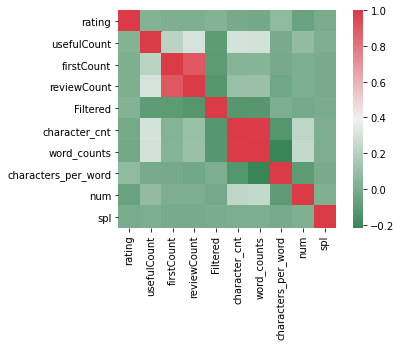

In [ ]:
import seaborn as sns
corr = dat.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.int), cmap=sns.diverging_palette(500, 10, as_cmap=True), square=True)

# Histogram	of the Dataset

In [ ]:
import plotly.express as px
fig = px.pie(dat, names='Filtered', title='Filtered',width=400, height=400)
fig.show()

In [ ]:
from matplotlib.pyplot import hist

filtered = dat[dat['Filtered']==True]
non_filtered = dat[dat['Filtered']==False]
col = dat.columns
col

Index(['reviewID', 'reviewerID', 'reviewContent', 'rating', 'usefulCount',
       'date', 'reviewerID.1', 'firstCount', 'reviewCount', 'Filtered',
       'character_cnt', 'word_counts', 'characters_per_word', 'num', 'spl'],
      dtype='object')

rating
Filtered: 3.786054043113045
non-Filtered: 3.69660807958369


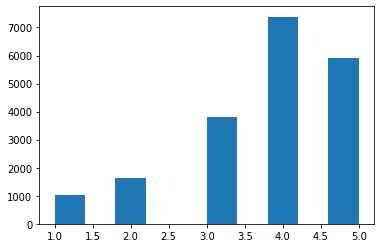

In [ ]:
print(col[3])
hist(dat[col[3]],weights=dat['Filtered'])
f=(filtered['rating']).sum()/filtered.shape[0]
nf=(non_filtered['rating']).sum()/non_filtered.shape[0]
print("Filtered: "+ str(f))
print("non-Filtered: "+ str(nf))

usefulCount
Filtered: 1.3587693553284081
non-Filtered: 2.101945704194445


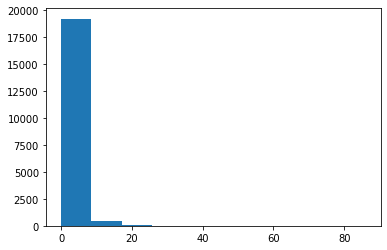

In [ ]:
print(col[4])
hist(dat[col[4]],weights=dat['Filtered'])
f=(filtered['usefulCount']).sum()/filtered.shape[0]
nf=(non_filtered['usefulCount']).sum()/non_filtered.shape[0]
print("Filtered: "+ str(f))
print("non-Filtered: "+ str(nf))

firstCount
Filtered: 87.55201902641433
non-Filtered: 150.66796589270413


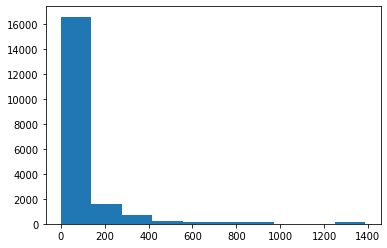

In [ ]:
print(col[7])
hist(dat[col[7]],weights=dat['Filtered'])
f=(filtered['firstCount']).sum()/filtered.shape[0]
nf=(non_filtered['firstCount']).sum()/non_filtered.shape[0]
print("Filtered: "+ str(f))
print("non-Filtered: "+ str(nf))

character_cnt
Filtered: 344.51624329521303
non-Filtered: 500.67868711989803


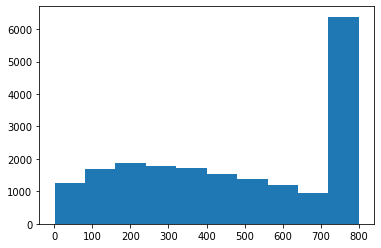

In [ ]:
print(col[10])
hist(dat[col[10]],weights=dat['Filtered'])
f=(filtered['reviewCount']).sum()/filtered.shape[0]
nf=(non_filtered['reviewCount']).sum()/non_filtered.shape[0]
print("Filtered: "+ str(f))
print("non-Filtered: "+ str(nf))

word_counts
Filtered: 90.24820362311507
non-Filtered: 104.04296850508892


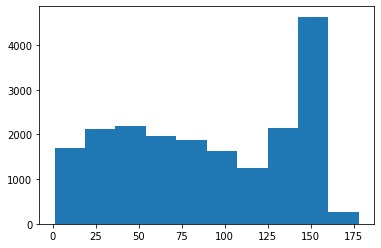

In [ ]:
print(col[11])
hist(dat[col[11]],weights=dat['Filtered'])
f=(filtered['word_counts']).sum()/filtered.shape[0]
nf=(non_filtered['word_counts']).sum()/non_filtered.shape[0]
print("Filtered: "+ str(f))
print("non-Filtered: "+ str(nf))

# Without Cosine Similarity

## Select Rows

In [ ]:
selected_columns = dat[dat.columns.difference(['reviewID', 'reviewerID','date','reviewerID.1','reviewContent','characters_per_word','spl'])]
dataframe = selected_columns.copy()
dataframe

,Filtered,character_cnt,firstCount,num,rating,reviewCount,usefulCount,word_counts
0,0.0,767,0.0,0,5.0,2.0,5.0,138
1,0.0,101,268.0,0,5.0,543.0,2.0,21
2,0.0,466,834.0,0,5.0,1463.0,0.0,102
3,0.0,791,43.0,0,4.0,158.0,0.0,135
4,0.0,795,133.0,0,3.0,725.0,0.0,141
...,...,...,...,...,...,...,...,...
115472,0.0,520,206.0,0,5.0,562.0,2.0,97
115473,0.0,505,35.0,0,4.0,502.0,3.0,93
115474,0.0,253,0.0,0,5.0,6.0,1.0,50
115475,0.0,318,12.0,0,3.0,122.0,1.0,59


## Resample Data using SMOTE

In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
y = dataframe['Filtered']
x = dataframe.drop({'Filtered'}, axis=1)
scaler = preprocessing.StandardScaler(with_mean=False)
x = scaler.fit_transform(x)
sm = SMOTE(random_state=27, ratio=1.0)
x,y= sm.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



## Split Data to training and testing sets

In [ ]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

## Random Forest Classifier

Accuracy =  89.00470219435736
Precision =  89.00470219435736
Recall =  85.82367441128652
F1_score=  88.6049218940358


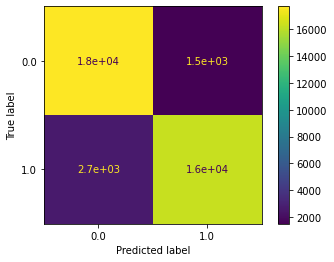

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     19213
         1.0       0.92      0.86      0.89     19067

    accuracy                           0.89     38280
   macro avg       0.89      0.89      0.89     38280
weighted avg       0.89      0.89      0.89     38280



In [ ]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
estimator.fit(x_train,y_train)
pred=estimator.predict(x_test)
Accuracy= accuracy_score(y_test, pred)*100
Precision = precision_score(y_test, pred, average='micro')*100
Recall= recall_score(y_test, pred)*100
F1_score= f1_score(y_test, pred)*100
print('Accuracy = ', Accuracy)
print('Precision = ', Precision)
print('Recall = ', Recall)
print('F1_score= ', F1_score)
plot_confusion_matrix(estimator, x_test, y_test)
plt.show()
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score 
classification_report_actual = classification_report(y_test,pred ) 
print(classification_report_actual )

In [ ]:
#dump(estimator, 'drive/MyDrive/RFC2.joblib')

['drive/MyDrive/RFC2.joblib']

## Gradient Boosting Classifier (Takes Time)

Accuracy =  89.00470219435736
Precision =  89.00470219435736
Recall =  85.82367441128652
F1_score=  88.6049218940358


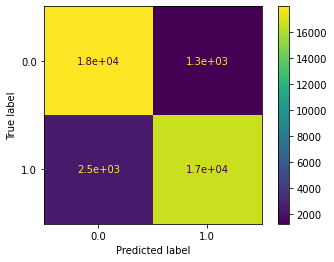

              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     19213
         1.0       0.92      0.86      0.89     19067

    accuracy                           0.89     38280
   macro avg       0.89      0.89      0.89     38280
weighted avg       0.89      0.89      0.89     38280



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(n_estimators= 1800,max_features= 'sqrt',max_depth= None)
estimator.fit(x_train,y_train)
pred=estimator.predict(x_test)
Accuracy= accuracy_score(y_test, pred)*100
Precision = precision_score(y_test, pred, average='micro')*100
Recall= recall_score(y_test, pred)*100
F1_score= f1_score(y_test, pred)*100
print('Accuracy = ', Accuracy)
print('Precision = ', Precision)
print('Recall = ', Recall)
print('F1_score= ', F1_score)
plot_confusion_matrix(estimator, x_test, y_test)
plt.show()
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score 
classification_report_actual = classification_report(y_test,pred ) 
print(classification_report_actual )

## Decision Tree Classifier

Accuracy =  83.51097178683385
Precision =  83.51097178683385
Recall =  84.19258404573347
F1_score=  83.57020146806184


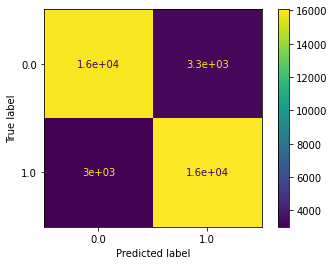

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83     19213
         1.0       0.83      0.84      0.84     19067

    accuracy                           0.84     38280
   macro avg       0.84      0.84      0.84     38280
weighted avg       0.84      0.84      0.84     38280



In [ ]:
from sklearn.tree import DecisionTreeClassifier
estimator= DecisionTreeClassifier()
estimator.fit(x_train,y_train)
pred=estimator.predict(x_test)
Accuracy= accuracy_score(y_test, pred)*100
Precision = precision_score(y_test, pred, average='micro')*100
Recall= recall_score(y_test, pred)*100
F1_score= f1_score(y_test, pred)*100
print('Accuracy = ', Accuracy)
print('Precision = ', Precision)
print('Recall = ', Recall)
print('F1_score= ', F1_score)
plot_confusion_matrix(estimator, x_test, y_test)
plt.show()
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score 
classification_report_actual = classification_report(y_test,pred ) 
print(classification_report_actual )

## Using XGBoosting Classifier with Kfold Cross Validation (Takes Time)

In [ ]:
# import xgboost
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import cross_val_score

# model = xgboost.XGBClassifier(subsample=0.85,learning_rate=0.3,max_depth= 95,max_features=1,min_samples_leaf=3,min_samples_split= 3,n_estimators= 1000)
# kfold = StratifiedKFold(n_splits=5,random_state=10,shuffle=True)
# for score in ["accuracy", "precision", "recall","f1"]:
#   print( score," : ",cross_val_score(model, x,y,scoring=score, cv=kfold).mean())

# Using Cosine Similarity

## Text Processing

In [ ]:
dat['processedtext'] = dat['reviewContent'].str.replace('[^\w\s]','') 
dat['processedtext'] = dat['processedtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dat['processedtext'] = dat['processedtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer() 
# dat['processedtext'] = dat['processedtext'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
stemmer = PorterStemmer()
dat['processedtext'] = dat['processedtext'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

dat[['character_cnt','word_counts','characters_per_word', 'spl', 'num', 'processedtext']].head()

,character_cnt,word_counts,characters_per_word,spl,num,processedtext
0,767,138,5.557971,0,0,i came chicago busi initi suppos stay downtown...
1,101,21,4.809524,0,0,i still love place took mu shu menu i deepli s...
2,466,102,4.568627,0,0,alan best cpa i know he know in out tax law lo...
3,791,135,5.859259,0,0,my famili use korean air mani mani year go asi...
4,795,141,5.638298,0,0,i hadnt grisanti sinc prehomecom dinner high s...


In [ ]:
# import string
# import nltk
# import re

# dat['processedtext'] = dat['reviewContent'].str.lower()
# dat['processedtext']= dat['processedtext'].str.translate(str.maketrans(dict.fromkeys(string.punctuation)))
# dat['processedtext'] = dat['processedtext'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
# from nltk.corpus import stopwords
# dat['processedtext'] = dat['processedtext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# dat[['character_cnt','word_counts','characters_per_word', 'spl', 'num', 'processedtext']].head()
# dat.head()

## Feature Extraction using TFIDF


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#bag_words = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
bag_words = TfidfVectorizer(max_features=500, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
dat_BOW = bag_words.fit_transform(dat['processedtext'])
dat_BOW

<115460x500 sparse matrix of type '<class 'numpy.float64'>'
	with 2662831 stored elements in Compressed Sparse Row format>

In [ ]:
doc_term_matrix = dat_BOW.todense()
df = pd.DataFrame(doc_term_matrix, columns=bag_words.get_feature_names())
df

,10,12,15,20,abl,absolut,actual,add,ago,airport,alreadi,alway,amaz,anoth,anyon,anyth,appet,area,arriv,art,ask,ate,atmospher,attent,avail,averag,away,awesom,bacon,bad,bag,bar,bartend,base,basic,bathroom,bbq,bean,beauti,bed,...,use,usual,varieti,veggi,veri,view,visit,wait,waiter,waitress,walk,wall,want,warm,wasnt,watch,water,way,wed,week,weekend,went,white,wife,window,wine,wing,wish,wonder,wont,work,world,worth,wouldnt,wrong,ye,year,yelp,youll,yummi
0,0.0,0.0,0.0,0.0,0.147174,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.15204,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.181138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.160963,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.161627,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.145536,0.0,0.140581,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.096419,0.0,0.0,0.138693,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115455,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.208541,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
115456,0.0,0.0,0.0,0.0,0.000000,0.0,0.160827,0.0,0.0,0.0,0.0,0.130453,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.156898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
115457,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.335308,0.0,0.000000,0.0,0.0,0.0,

## Taking a slice from the data

In [ ]:
x = df[:20000]
data = dat[:20000]

## Find the Cosine Similarity of the Slice

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
#x = x.astype(np.float32)
cosine = cosine_similarity(x,x)
similarity = []
for i in range(len(cosine)):
  similarity.append(cosine[i].mean())
data['similarity'] = similarity
cosine

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[1.        , 0.        , 0.02453691, ..., 0.17701672, 0.        ,
        0.0371879 ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.12453031,
        0.        ],
       [0.02453691, 0.        , 1.        , ..., 0.04273199, 0.        ,
        0.06470277],
       ...,
       [0.17701672, 0.        , 0.04273199, ..., 1.        , 0.        ,
        0.03894802],
       [0.        , 0.12453031, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.0371879 , 0.        , 0.06470277, ..., 0.03894802, 0.        ,
        1.        ]])

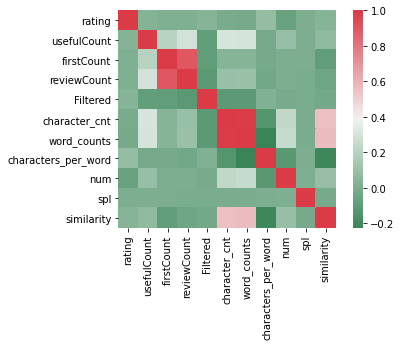

In [ ]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.int), cmap=sns.diverging_palette(500, 10, as_cmap=True), square=True)

Filtered: 3.786054043113045
non-Filtered: 3.69660807958369


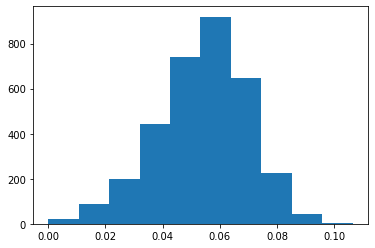

In [ ]:
#print(data.columns[16])
hist(data['similarity'],weights=data['Filtered'])
f=(filtered['rating']).sum()/filtered.shape[0]
nf=(non_filtered['rating']).sum()/non_filtered.shape[0]
print("Filtered: "+ str(f))
print("non-Filtered: "+ str(nf))

## Select Rows

In [ ]:
selected_columns = data[data.columns.difference(['reviewID', 'reviewerID','date','reviewerID.1', 'processedtext','reviewContent','spl','characters_per_word'])]
dataframe1 = selected_columns.copy()
dataframe1

,Filtered,character_cnt,firstCount,num,rating,reviewCount,similarity,usefulCount,word_counts
0,0.0,767,0.0,0,5.0,2.0,0.047601,5.0,138
1,0.0,101,268.0,0,5.0,543.0,0.037607,2.0,21
2,0.0,466,834.0,0,5.0,1463.0,0.038082,0.0,102
3,0.0,791,43.0,0,4.0,158.0,0.066638,0.0,135
4,0.0,795,133.0,0,3.0,725.0,0.054297,0.0,141
...,...,...,...,...,...,...,...,...,...
19995,0.0,760,174.0,0,4.0,1022.0,0.059894,0.0,148
19996,0.0,776,94.0,0,3.0,580.0,0.058954,1.0,144
19997,0.0,789,5.0,1,4.0,12.0,0.059344,3.0,153
19998,0.0,35,21.0,0,4.0,105.0,0.037365,0.0,9


## Number of filtered and non-filtered samples of the slice

In [ ]:
dataframe1['Filtered'].value_counts()

0.0    16671
1.0     3329
Name: Filtered, dtype: int64

In [ ]:
# x = pd.DataFrame(data,columns=bag_words.get_feature_names())

## Resample data using SMOTE

In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

y = dataframe1['Filtered']
x = dataframe1.drop({'Filtered'}, axis=1)
scaler = preprocessing.StandardScaler(with_mean=False)
x = scaler.fit_transform(x)
sm = SMOTE(random_state=27, ratio=1.0)
x,y= sm.fit_sample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



## Using XGBoosting Classifier with Kfold Cross Validation (Takes Time)

In [ ]:
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

model = xgboost.XGBClassifier(subsample=0.85,learning_rate=0.3,max_depth= 95,max_features=1,min_samples_leaf=3,min_samples_split= 3,n_estimators= 1000)
kfold = StratifiedKFold(n_splits=5,random_state=10,shuffle=True)
for score in ["accuracy", "precision", "recall","f1"]:
  print( score," : ",cross_val_score(model, x,y,scoring=score, cv=kfold).mean())

accuracy  :  0.903575047473636
precision  :  0.931160719441238
recall  :  0.8716331216515318
f1  :  0.9003909601827008


## Split Data to training and testing sets

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=27)

## Random Forest Classifier

Accuracy =  87.70430349377718
Precision =  87.70430349377718
Recall =  84.27842784278428
F1_score=  87.26312519415967


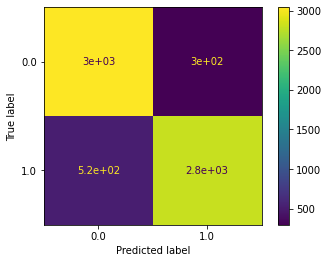

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      3336
         1.0       0.90      0.84      0.87      3333

    accuracy                           0.88      6669
   macro avg       0.88      0.88      0.88      6669
weighted avg       0.88      0.88      0.88      6669



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix
import matplotlib.pyplot as plt
estimator = RandomForestClassifier()
estimator.fit(x_train,y_train)
pred=estimator.predict(x_test)
Accuracy= accuracy_score(y_test, pred)*100
Precision = precision_score(y_test, pred, average='micro')*100
Recall= recall_score(y_test, pred)*100
F1_score= f1_score(y_test, pred)*100
print('Accuracy = ', Accuracy)
print('Precision = ', Precision)
print('Recall = ', Recall)
print('F1_score= ', F1_score)
plot_confusion_matrix(estimator, x_test, y_test)
plt.show()
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score 
classification_report_actual = classification_report(y_test,pred ) 
print(classification_report_actual )

## Gradient Boosting Classifier

Accuracy =  87.70430349377718
Precision =  87.70430349377718
Recall =  84.27842784278428
F1_score=  87.26312519415967


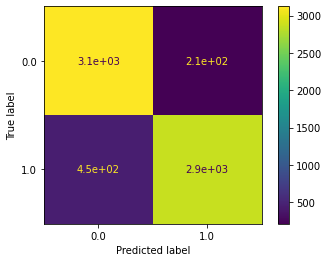

              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      3336
         1.0       0.90      0.84      0.87      3333

    accuracy                           0.88      6669
   macro avg       0.88      0.88      0.88      6669
weighted avg       0.88      0.88      0.88      6669



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(n_estimators= 1800,max_features= 'sqrt',max_depth= None)
estimator.fit(x_train,y_train)
pred=estimator.predict(x_test)
Accuracy= accuracy_score(y_test, pred)*100
Precision = precision_score(y_test, pred, average='micro')*100
Recall= recall_score(y_test, pred)*100
F1_score= f1_score(y_test, pred)*100
print('Accuracy = ', Accuracy)
print('Precision = ', Precision)
print('Recall = ', Recall)
print('F1_score= ', F1_score)
plot_confusion_matrix(estimator, x_test, y_test)
plt.show()
from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score 
classification_report_actual = classification_report(y_test,pred ) 
print(classification_report_actual )cation_report(y_test,smote_pred ) 
print(classification_report_actual )

## Decision Tree Classifier

Accuracy =  80.79172289698604
Precision =  80.79172289698604
Recall =  81.03810381038103
F1_score=  80.83196169385006


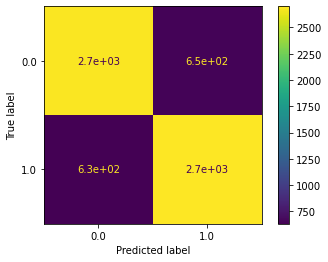

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      3336
         1.0       0.81      0.81      0.81      3333

    accuracy                           0.81      6669
   macro avg       0.81      0.81      0.81      6669
weighted avg       0.81      0.81      0.81      6669



In [ ]:
from sklearn.tree import DecisionTreeClassifier
estimator= DecisionTreeClassifier()
estimator.fit(x_train,y_train)
smote_pred=estimator.predict(x_test)
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100
print('Accuracy = ', acc_test_smote)
print('Precision = ', acc_pr_smote)
print('Recall = ', acc_recall_smote)
print('F1_score= ', acc_f1_smote)
plot_confusion_matrix(estimator, x_test, y_test)
plt.show()
classification_report_actual = classification_report(y_test,smote_pred ) 
print(classification_report_actual )

## Export Model

In [ ]:
pred_data = "WsLawN3AiNlGwCe8e_RBqw,1ieBOfhSvtz-wesCs9Z7-Q,Tourist trap. Went here after the Sam Adams brewery tour. There was a free trolley to take us which was nice because the neighborhood is full of barbershops and bodegas NOT pubs.  (This place is a little too far to walk.) We waited in line outside for 10-15 mins just to get in the door.  Around 3:30pm on a Friday.  Ok I can understand.  It's a beautiful day and also St. Pat's weekend.  We finally get in and there is no host/hostess or maybe there was one there just doing a really bad job.  Ok so we quickly grab some corner seats at the jam packed bar so we don't have to continue to wait forever.  Wrong.  Typical crappy Boston service the bartender doesn't ask you if you want a beer they just kind of look at you and grunt.  And we had to wait over an hour (!!!) to get our food.   All ,2,0,3/18/2011,1ieBOfhSvtz-wesCs9Z7-Q,4,60,1"
#pred_data = "-0tp_ZOsFjYEjCOBLE5bmw,IhmBr-yHC8xLjdnoq7O37w,For the neighborhood Mainelli's is as good as you'll get. When I came I thought the food was good but half of my party disagreed. The problem we all saw with Mainellis was that you'll spend as much here as you would at a Federal Hill joint like Joe Marzilli's Old Canteen ($20 for a 5 course meal) but the setting is more like Pizza Hut. I thought the spaghetti and meatballs were good. The balls were light and fluffy and the sauce was delicious. The portion was tiny though. Calamari came with about 10 rings and weren't anything to write home about. Eggplant ricotta cheese thing was delicious and our Caesar salads had a delicious buttery Caesar dressing. Pan seared scrod was served to the 96 year old at our table and she loved it. The food is good enough and I'd love to say more to keep t,3,11,8/31/2010,IhmBr-yHC8xLjdnoq7O37w,278,1167,0"
#pred_data = "wSmmRZcnC7V890pHX337sw,0vgje_Rk-iGizQiNbsAyHA,I'm going to break this down into experience food/venue and money. 1. Experience. The experience alone is definitely worth your money. My friends and I went here for a birthday dinner and we were DEFINITELY not disappointed. We kept laughing the whole time and there were about 2-3 waiters/ninjas attending us the whole time. The main waiter seemed a little under the weather but the other two people totally made up for it. It was also really cute because they sang happy birthday and brought my friend a cute cake. Telling more detail is only going to ruin the surprises so i'll skip out on that but its definitely a memorable experience. Did anyone mention that there's a magic show in the end? Pretty corny but pretty cool at the same time too. Food/Venue - Between the three people we ha,4,1,7/5/2010,0vgje_Rk-iGizQiNbsAyHA,17,161,1"
#pred_data = "wsMEBMz4WH8_OpieGli37Q,augJQotyLB503iq1gVJ_tg,This ain't no sunset in Hawaii it's not even a beach in the Caribbean but damn how is your lake water so clear?!?!  Lake Shore Drive is a beautiful strip of land running North South along the lake.  There is a beautiful split between a very nice Chicago skyline and the crystal clear colour of the lake. On one side you see the well planned out city of Chicago and on the other you see boats swimmers and people just enjoying the water.  The drive itself is littered with beaches stairs for people to sit on and a path carved out for runners bikers skate boarders roller blades and walkers.  The area itself is busy but not to the point were it's overwhelming.  Between the 2 beaches Navy Pier and the marina on this strip I really don't have any reason to leave.  Mind you Navy Pier is a tour,5,1,9/26/2012,augJQotyLB503iq1gVJ_tg,157,605,0"
pred_data = pred_data.split(',')
pred_col = ['reviewID','reviewerID',	'reviewContent',	'rating',	'usefulCount',	'date',	'reviewerID.1',	'firstCount',	'reviewCount'	,'Filtered']
z = {pred_col[0]:pred_data[0],pred_col[1]:pred_data[1],pred_col[2]:pred_data[2],pred_col[3]:pred_data[3],
     pred_col[4]:pred_data[4],pred_col[5]:pred_data[5],pred_col[6]:pred_data[6],pred_col[7]:pred_data[7],
     pred_col[8]:pred_data[8],pred_col[9]:pred_data[9]}

k = pd.DataFrame(z,index = [0])
k['rating'] = k['rating'].astype(float)
k['usefulCount'] = k['usefulCount'].astype(float)
k['firstCount'] = k['firstCount'].astype(float)
k['reviewCount'] = k['reviewCount'].astype(float)
k['Filtered'] = k['Filtered'].astype(float)
k['character_cnt'] = k['reviewContent'].str.len()
k['word_counts'] = k['reviewContent'].str.split().str.len()
k['characters_per_word'] = k['character_cnt']/dat['word_counts']
k['num'] = k['reviewContent'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
k['spl'] = k['reviewContent'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
s = k[k.columns.difference(['reviewID', 'reviewerID','date','reviewerID.1','reviewContent','Filtered'])]
k = s.copy()

clf = load('drive/MyDrive/RFC.joblib') 
predction = clf.predict(k)
if predction[0] == 0.0:
  print("Review is non-Spam")
elif predction[0] == 1.0:
  print("Review is Spam")

Review is Spam
